In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
path = '/home/yong/auto_parking/saved_model/step_reward5000.csv'


In [15]:
df = pd.read_csv(path, names=["episode", "local_step", "score", "result"])
df["success"] = (df["result"] == "succeed").astype(int)

df['episode'] = df['episode'].apply(lambda x: x-1)
df = df[df['episode']<= 1000]

In [18]:
index = 1
pre_index = 0
for i in range(1,11):
    index = i*100
    print(sum(df[(df['episode']>pre_index)&(df['episode'] <= index)]['result'] == 'succeed'))
    pre_index = index

81
71
67
60
69
63
66
64
61
62


In [19]:

# === 표본 단위 (100회씩) ===
chunk_size = 100
sample_rates = df["success"].groupby(df.index // chunk_size).mean()

# === 평균, 표준편차, 신뢰구간 ===
mu = sample_rates.mean()
sigma = sample_rates.std(ddof=1)
n = len(sample_rates)
se = stats.sem(sample_rates)
ci_low, ci_high = stats.t.interval(0.95, n-1, loc=mu, scale=se)

print("표본 개수:", n)
print("평균 성공률:", mu)
print("표본 표준편차:", sigma)
print("95% CI:", (ci_low, ci_high))


표본 개수: 10
평균 성공률: 0.664
표본 표준편차: 0.06221825384170719
95% CI: (0.6194917424357992, 0.7085082575642009)


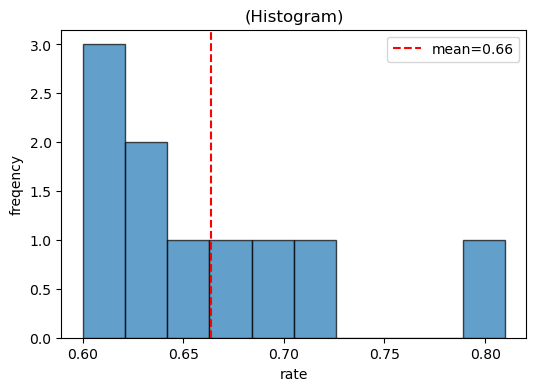

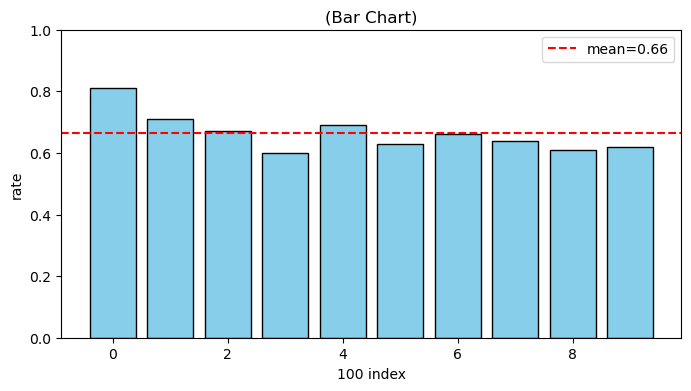

In [22]:

# === (A) 히스토그램: 표본 성공률 분포 ===
plt.figure(figsize=(6,4))
plt.hist(sample_rates, bins=10, edgecolor="black", alpha=0.7)
plt.axvline(mu, color="red", linestyle="--", label=f"mean={mu:.2f}")
plt.title("(Histogram)")
plt.xlabel("rate")
plt.ylabel("freqency")
plt.legend()
plt.show()

# === (B) 막대그래프: 각 표본 성공률 + 평균선 ===
plt.figure(figsize=(8,4))
plt.bar(range(len(sample_rates)), sample_rates, color="skyblue", edgecolor="black")
plt.axhline(mu, color="red", linestyle="--", label=f"mean={mu:.2f}")
plt.title("(Bar Chart)")
plt.xlabel("100 index")
plt.ylabel("rate")
plt.ylim(0,1)
plt.legend()
plt.show()